In [1]:
%matplotlib inline

In [238]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report

import mlflow


#  Data Set
- https://www.kaggle.com/datasets/rajkumarpandey02/electric-vehicle-population-data/data


# Workflow To Be Followed

- Step 1: Loading The Dataset
- Step 2: Performing EDA
- Step 3: Feature Engineering
- Step 4: Model Training & Evaluation 

In [346]:
experiment = mlflow.create_experiment(name = "Initial Tetsing")

In [347]:
run = mlflow.start_run(experiment_id = experiment, run_name="First Run")

## Step 1: Loading The Dataset

In [383]:
# Load the data set
electric_vehicles = pd.read_csv("data/Electric_Vehicle_Population_Data.csv")

In [384]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10


In [385]:
electric_vehicles.Model.unique()


array(['MODEL 3', 'LEAF', 'MODEL S', 'I3', 'Q5 E', 'PRIUS PRIME', 'NIRO',
       'MODEL Y', '500', 'C-MAX', 'MODEL X', 'VOLT', 'X5', 'FUSION',
       'IONIQ', 'X3', 'XC90', 'FOCUS', 'I8', 'BOLT EV', 'E-TRON', 'RAV4',
       'A3', 'XC60', 'F-150', 'E-GOLF', 'S90', 'XC40', 'PACIFICA',
       'RAV4 PRIME', 'FORTWO', 'KONA ELECTRIC', 'ID.4', 'SPARK', 'R1S',
       '330E', 'SOLTERRA', 'WRANGLER', 'C40', 'CLARITY', 'IONIQ 5',
       'MUSTANG MACH-E', 'AVIATOR', 'AIR', 'SORENTO', 'EV6', 'EDV',
       'CAYENNE', 'ESCAPE', 'S60', 'OUTLANDER', 'Q4', 'PS2',
       'FORTWO ELECTRIC DRIVE', 'PRIUS PLUG-IN', nan, 'EQS-CLASS SEDAN',
       'BOLT EUV', 'BZ4X', 'R1T', 'OPTIMA', 'TAYCAN', 'I4', 'COUNTRYMAN',
       'EQ FORTWO', 'PANAMERA', 'IX', 'ARIYA', 'SOUL', '530E', 'I-MIEV',
       'EQB-CLASS', 'HARDTOP', 'GRAND CHEROKEE', 'S-CLASS', 'E-TRON GT',
       'SOUL EV', 'CORSAIR', 'B-CLASS', 'I-PACE', 'E-TRON SPORTBACK',
       'TRANSIT', 'ELR', 'GLE-CLASS', 'SANTA FE', 'KONA', 'Q5', 'NX',
       'ROADST

In [397]:
#>>> le = LabelEncoder()
#>>> le.fit([1, 2, 2, 6])
le = LabelEncoder()
models = le.fit_transform(electric_vehicles.Model.values)
states = le.fit_transform(electric_vehicles.State)
city = le.fit_transform(electric_vehicles.City)
county = le.fit_transform(electric_vehicles.County)

In [398]:
electric_vehicles.Model = models
electric_vehicles.State = states
electric_vehicles.City = city
electric_vehicles.County = county

In [399]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,155,592,44,98512.0,2019,TESLA,71,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.000000,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,67,107,44,98236.0,2022,NISSAN,69,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,87.780838,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,142,533,44,98290.0,2020,TESLA,71,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.000000,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,73,510,44,98134.0,2020,TESLA,71,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.000000,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,142,157,44,98020.0,2013,TESLA,72,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.000000,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135025,1G1RA6E46D,73,464,44,98056.0,2013,CHEVROLET,117,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.000000,0.0,11.0,231205173,POINT (-122.18050499999998 47.50005500000003),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
135027,JA4J24A54L,155,401,44,98502.0,2020,MITSUBISHI,79,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.000000,0.0,35.0,100639514,POINT (-122.92145 47.04593500000004),PUGET SOUND ENERGY INC,5.306701e+10
135029,1G1RD6S56H,25,606,44,98682.0,2017,CHEVROLET,117,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.000000,0.0,17.0,140190424,POINT (-122.51464729999998 45.67862000000008),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
135030,1C4JJXN68P,73,509,44,98148.0,2023,JEEP,119,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.000000,0.0,33.0,235938776,POINT (-122.32806 47.46155),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [400]:
#Battery Electric Vehicle (BEV)
#df[(df == 'banana').any(axis=1)]
electric_vehicle_type = electric_vehicles[( electric_vehicles['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)')]

In [401]:
plug_in_hybrid_electric_vehicle = electric_vehicles[( electric_vehicles['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)')]

In [402]:
electric_vehicles["Electric Vehicle Type"].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            103882
Plug-in Hybrid Electric Vehicle (PHEV)     31156
Name: count, dtype: int64

In [403]:
electric_vehicle_type["Electric Range"] = electric_vehicle_type["Electric Range"].mask(electric_vehicle_type["Electric Range"].eq(0.0), electric_vehicle_type["Electric Range"].mean()).copy()
electric_vehicles[""] = electric_vehicle_type["Electric Range"]

C:\Users\GETAC USER\AppData\Local\Temp\ipykernel_22408\4188431164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electric_vehicle_type["Electric Range"] = electric_vehicle_type["Electric Range"].mask(electric_vehicle_type["Electric Range"].eq(0.0), electric_vehicle_type["Electric Range"].mean()).copy()


In [404]:
plug_in_hybrid_electric_vehicle["Electric Range"] = plug_in_hybrid_electric_vehicle["Electric Range"].mask(plug_in_hybrid_electric_vehicle["Electric Range"].eq(0.0), plug_in_hybrid_electric_vehicle["Electric Range"].mean()).copy()

C:\Users\GETAC USER\AppData\Local\Temp\ipykernel_22408\2641951656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plug_in_hybrid_electric_vehicle["Electric Range"] = plug_in_hybrid_electric_vehicle["Electric Range"].mask(plug_in_hybrid_electric_vehicle["Electric Range"].eq(0.0), plug_in_hybrid_electric_vehicle["Electric Range"].mean()).copy()


In [405]:
new_electric_vehicles = [electric_vehicle_type, plug_in_hybrid_electric_vehicle]
#new_electric_vehicles.appned(electric_vehicle_type)plug_in_hybrid_electric_vehicle
#new_electric_vehicles.append(plug_in_hybrid_electric_vehicle)

#frames = [df1, df2, df3]

electric_vehicles = pd.concat(new_electric_vehicles)

In [406]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,155,592,44,98512.0,2019,TESLA,71,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.000000,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,67,107,44,98236.0,2022,NISSAN,69,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,87.780838,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,142,533,44,98290.0,2020,TESLA,71,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.000000,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,73,510,44,98134.0,2020,TESLA,71,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.000000,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,142,157,44,98020.0,2013,TESLA,72,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.000000,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135025,1G1RA6E46D,73,464,44,98056.0,2013,CHEVROLET,117,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.000000,0.0,11.0,231205173,POINT (-122.18050499999998 47.50005500000003),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
135027,JA4J24A54L,155,401,44,98502.0,2020,MITSUBISHI,79,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.000000,0.0,35.0,100639514,POINT (-122.92145 47.04593500000004),PUGET SOUND ENERGY INC,5.306701e+10
135029,1G1RD6S56H,25,606,44,98682.0,2017,CHEVROLET,117,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.000000,0.0,17.0,140190424,POINT (-122.51464729999998 45.67862000000008),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
135030,1C4JJXN68P,73,509,44,98148.0,2023,JEEP,119,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.000000,0.0,33.0,235938776,POINT (-122.32806 47.46155),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [297]:
electric_vehicles.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,155,592,44,98512.0,2019,TESLA,71,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,67,107,44,98236.0,2022,NISSAN,69,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,142,533,44,98290.0,2020,TESLA,71,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,73,510,44,98134.0,2020,TESLA,71,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,142,157,44,98020.0,2013,TESLA,72,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10


In [8]:
electric_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135030 non-null  object 
 2   City                                               135030 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135030 non-null  float64
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

In [326]:
electric_vehicle_type["Electric Range"].min()

29.0

In [327]:
electric_vehicle_type["Electric Range"].isin([0.0]).sum()

0

In [328]:
plug_in_hybrid_electric_vehicle["Electric Range"].min()

6.0

In [329]:
plug_in_hybrid_electric_vehicle["Electric Range"].isin([0.0]).sum()

0

In [9]:
electric_vehicles.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,135030.000000,135038.000000,135037.000000,135037.000000,134726.000000,1.350380e+05,1.350300e+05
mean,98171.001577,2019.662880,74.591964,1448.407325,29.504379,2.063432e+08,5.297233e+10
std,2450.367211,3.001676,98.744120,9683.658138,14.783780,8.582417e+07,1.635783e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.606305e+08,5.303301e+10
50%,98121.000000,2021.000000,21.000000,0.000000,34.000000,2.059563e+08,5.303303e+10
75%,98370.000000,2022.000000,150.000000,0.000000,43.000000,2.308888e+08,5.305307e+10
max,99701.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [10]:
electric_vehicles["Electric Range"].isin([0.0]).sum()

56983

In [11]:
electric_vehicles["Electric Range"].count()

135037

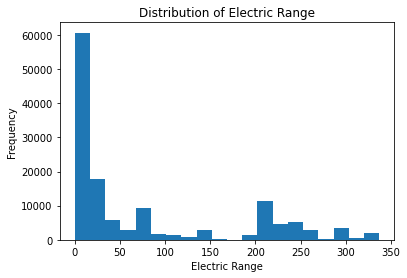

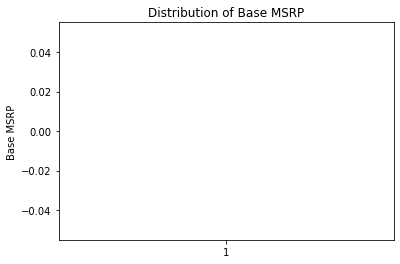

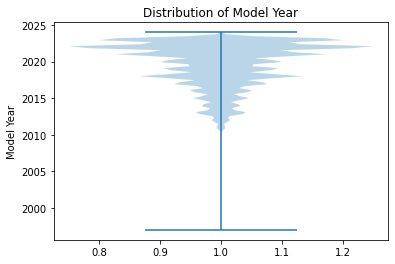

In [12]:
plt.hist(electric_vehicles['Electric Range'], bins=20)
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Range')
plt.show()

plt.boxplot(electric_vehicles['Base MSRP'])
plt.ylabel('Base MSRP')
plt.title('Distribution of Base MSRP')
plt.show()

plt.violinplot(electric_vehicles['Model Year'])
plt.ylabel('Model Year')
plt.title('Distribution of Model Year')
plt.show()

In [13]:
#electric_vehicles.nan_to_num(np.nan)
electric_vehicles.isnull().sum()

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

In [330]:
electric_vehicles["Electric Range"].count()

135037

In [331]:
electric_vehicles.dropna(subset=["Electric Range"])
electric_vehicles["Electric Range"].count()

135037

In [263]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_Range_Category
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,71,0,Clean Alternative Fuel Vehicle Eligible,220.000000,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10,4.0
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,69,0,Eligibility unknown as battery range has not b...,74.591964,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10,0.0
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,71,0,Clean Alternative Fuel Vehicle Eligible,266.000000,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10,4.0
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,71,0,Clean Alternative Fuel Vehicle Eligible,322.000000,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,5.0
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,72,0,Clean Alternative Fuel Vehicle Eligible,208.000000,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,72,0,Clean Alternative Fuel Vehicle Eligible,330.000000,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,5.0
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,74,0,Eligibility unknown as battery range has not b...,74.591964,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10,0.0
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,72,0,Eligibility unknown as battery range has not b...,74.591964,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,0.0
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,63,0,Eligibility unknown as battery range has not b...,74.591964,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10,0.0


In [301]:
#electric_vehicles["Electric Range"] = electric_vehicles["Electric Range"].mask(electric_vehicles["Electric Range"].eq(0.0), electric_vehicles["Electric Range"].mean())
#electric_vehicle_type["Electric Range"].mean()

In [303]:
plug_in_hybrid_electric_vehicle["Electric Range"] = plug_in_hybrid_electric_vehicle["Electric Range"].mask(plug_in_hybrid_electric_vehicle["Electric Range"].eq(0.0), plug_in_hybrid_electric_vehicle["Electric Range"].mean()).copy()

C:\Users\GETAC USER\AppData\Local\Temp\ipykernel_22408\2641951656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plug_in_hybrid_electric_vehicle["Electric Range"] = plug_in_hybrid_electric_vehicle["Electric Range"].mask(plug_in_hybrid_electric_vehicle["Electric Range"].eq(0.0), plug_in_hybrid_electric_vehicle["Electric Range"].mean()).copy()


In [304]:
electric_vehicle_type

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,71,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.000000,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,69,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,87.780838,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,71,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.000000,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,71,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.000000,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,72,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.000000,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135032,5YJ3E1EC4L,Snohomish,Edmonds,WA,98020.0,2020,TESLA,71,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308.000000,0.0,32.0,3315315,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,72,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.000000,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,74,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,87.780838,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,72,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,87.780838,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [306]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,71,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.000000,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,69,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,87.780838,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,71,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.000000,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,71,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.000000,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,72,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.000000,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135025,1G1RA6E46D,King,Renton,WA,98056.0,2013,CHEVROLET,117,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.000000,0.0,11.0,231205173,POINT (-122.18050499999998 47.50005500000003),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
135027,JA4J24A54L,Thurston,Olympia,WA,98502.0,2020,MITSUBISHI,79,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.000000,0.0,35.0,100639514,POINT (-122.92145 47.04593500000004),PUGET SOUND ENERGY INC,5.306701e+10
135029,1G1RD6S56H,Clark,Vancouver,WA,98682.0,2017,CHEVROLET,117,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.000000,0.0,17.0,140190424,POINT (-122.51464729999998 45.67862000000008),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
135030,1C4JJXN68P,King,Seatac,WA,98148.0,2023,JEEP,119,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.000000,0.0,33.0,235938776,POINT (-122.32806 47.46155),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [206]:
def create_electric_range_category(df, column='Electric Range'):
    def categorize_range(electric_range):
        if electric_range == 0:
            return 0.0
        elif electric_range < 50:
            return 1.0 #very Short
        elif 50 <= electric_range <= 100:
            return 3.0 #very Short
        elif 100 < electric_range <= 300:
            return 4.0 #"Medium"
        elif 300 < electric_range:
            return 5.0 #long
        else:
            return -1.0

    df['Electric_Range_Category'] = df[column].apply(categorize_range)
    return df

electric_vehicles = create_electric_range_category(electric_vehicles, column='Electric Range')



C:\Users\GETAC USER\AppData\Local\Temp\ipykernel_22408\4181912058.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electric_Range_Category'] = df[column].apply(categorize_range)


In [207]:
electric_vehicles['Electric_Range_Category']

0         4.0
1         0.0
2         4.0
3         5.0
4         4.0
         ... 
135033    5.0
135034    0.0
135035    0.0
135036    0.0
135037    1.0
Name: Electric_Range_Category, Length: 135037, dtype: float64

In [208]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_Range_Category
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,0,Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10,4.0
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,0,Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10,0.0
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,0,Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10,4.0
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,0,Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,5.0
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,0,Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,0,Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,5.0
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,0,Eligibility unknown as battery range has not b...,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10,0.0
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,0,Eligibility unknown as battery range has not b...,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,0.0
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,IONIQ 5,0,Eligibility unknown as battery range has not b...,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10,0.0


In [56]:
electric_vehicles["Electric Range"].count()
#imp_mean = SimpleImputer(missing_values = 0.0, strategy='mean')
#imp_mean = imp_mean.fit_transform([electric_vehicles["Electric Range"]])

135037

In [57]:
electric_vehicles["Electric Range"].max()

337.0

In [58]:
electric_vehicles["Electric Range"].min()

6.0

In [59]:
electric_vehicles["Electric Range"].mean()

106.06832843299934

In [60]:
electric_vehicles["Electric Range"]

0         220.000000
1          74.591964
2         266.000000
3         322.000000
4         208.000000
             ...    
135033    330.000000
135034     74.591964
135035     74.591964
135036     74.591964
135037     19.000000
Name: Electric Range, Length: 135038, dtype: float64

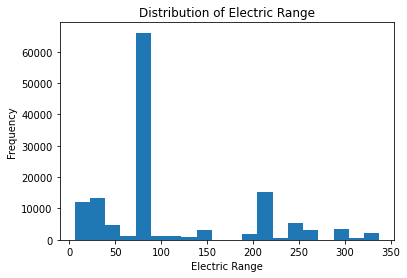

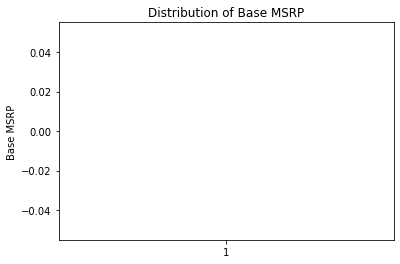

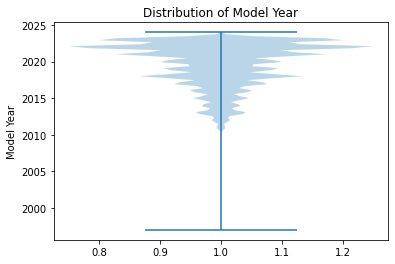

In [61]:
plt.hist(electric_vehicles["Electric Range"], bins=20)
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Range')
plt.show()

plt.boxplot(electric_vehicles['Base MSRP'])
plt.ylabel('Base MSRP')
plt.title('Distribution of Base MSRP')
plt.show()

plt.violinplot(electric_vehicles['Model Year'])
plt.ylabel('Model Year')
plt.title('Distribution of Model Year')
plt.show()

In [209]:
electric_vehicles['Electric Range'].isna().sum()


0

In [210]:
#electric_vehicles.dropna(subset=["Electric Range"])
electric_vehicles = electric_vehicles[electric_vehicles['Electric Range'].notna()]

In [211]:
electric_vehicles['Electric Range'].isna().sum()

0

In [212]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_Range_Category
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,0,Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10,4.0
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,0,Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10,0.0
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,0,Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10,4.0
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,0,Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,5.0
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,0,Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,0,Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,5.0
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,0,Eligibility unknown as battery range has not b...,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10,0.0
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,0,Eligibility unknown as battery range has not b...,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,0.0
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,IONIQ 5,0,Eligibility unknown as battery range has not b...,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10,0.0


In [233]:
electric_vehicle_type_mapping = {type:idx for idx, type in enumerate(np.unique(electric_vehicles['Electric Vehicle Type']))}
#electric_vehicles

In [234]:
electric_vehicle_type_mapping

{0: 0, 1: 1}

In [215]:
electric_vehicle_type_01 = electric_vehicles['Electric Vehicle Type'].map(electric_vehicle_type_mapping)

In [216]:
electric_vehicle_type_01

0         0
1         0
2         0
3         0
4         0
         ..
135033    0
135034    0
135035    0
135036    0
135037    1
Name: Electric Vehicle Type, Length: 135037, dtype: int64

In [217]:
electric_vehicles['Electric Vehicle Type'] = electric_vehicle_type_01

In [245]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_Range_Category
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,71,0,Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10,4.0
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,69,0,Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10,0.0
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,71,0,Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10,4.0
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,71,0,Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,5.0
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,72,0,Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,72,0,Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,5.0
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,74,0,Eligibility unknown as battery range has not b...,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10,0.0
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,72,0,Eligibility unknown as battery range has not b...,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,0.0
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,63,0,Eligibility unknown as battery range has not b...,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10,0.0


In [258]:
#electric_vehicles['Model Year'] = pd.to_numeric(electric_vehicles['Model Year'], errors="ignore") 

#print(electric_vehicles.dtypes)

#assenger_attributes.drop(columns = ["PassengerId", "Name", "Cabin"])
X = electric_vehicles[['Base MSRP', 'Electric Vehicle Type', 'Model']]
#X = electric_vehicles.drop(columns = ['Electric Range'])

y = electric_vehicles['Electric Range']
#scaler = MinMaxScaler()
#y = scaler.fit_transform(electric_vehicles['Electric_Range_Category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42434)

linear_model = LogisticRegression(C = 1)
#model = LogisticRegression(C = 10e9)
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [256]:
linear_model.score(X_train,y_train)

0.6362972758529489

In [257]:
linear_model.score(X_test,y_test)

0.6384281200631912

In [22]:
mlflow.log_artifact("data/Electric_Vehicle_Population_Data.csv")

In [17]:
#Parameters
mlflow.log_param("C", 1)
mlflow.log_param("train_test_split", False)

# Metics
for train_step in range(100):
    mlflow.log_metric("test_metrics", train_step **2, step = train_step) # accuracy


In [345]:
mlflow.end_run()

MlflowException: The run 018bf706d180475d87a085fce63d5db3 must be in 'active' lifecycle_stage.